In [1]:
print ("hello")

hello


# Student Performance indicator

## Life cycle of Machhine learning Project

    understanding the problem statement
    data collection
    Data checks to perform
    Exploratory data analysis
    Data pre-processing
    Model Training
    choose best model

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("/home/bcl6/projects/dev-ops/learn-and-POC/ML-MachineLearning/mlproject-Kirsh-Naik-folder/artifacts/data.csv")

In [6]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

## Data Checks to perform

#### . Check missing values 
#### . Check duplicates
#### . Check data type
#### . Check the number of unique valus for each column
#### . Check statistics of data set
#### . chekc various categories present in the different categorical column


In [10]:
df.isna().sum()


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [16]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [19]:
print("categories in 'gender' variable:     ",end="")
print(df['gender'].unique())

categories in 'gender' variable:     ['female' 'male']


In [22]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [24]:
numeric_features
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [25]:
print ('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']


In [26]:
print ('\n We have {} categorical features : {}'.format(len(categorical_features), categorical_features))


 We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [27]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [33]:
df["total-score"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["avg-score"]=df["total-score"]/3

In [34]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total-score,avg-score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [39]:
reading_less_20 = df[df['reading_score'] <= 20]['avg-score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['avg-score'].count()
math_less_20    = df[df['math_score']    <= 20]['avg-score'].count()


# Histogram and & KDE

<function matplotlib.pyplot.show(close=None, block=None)>

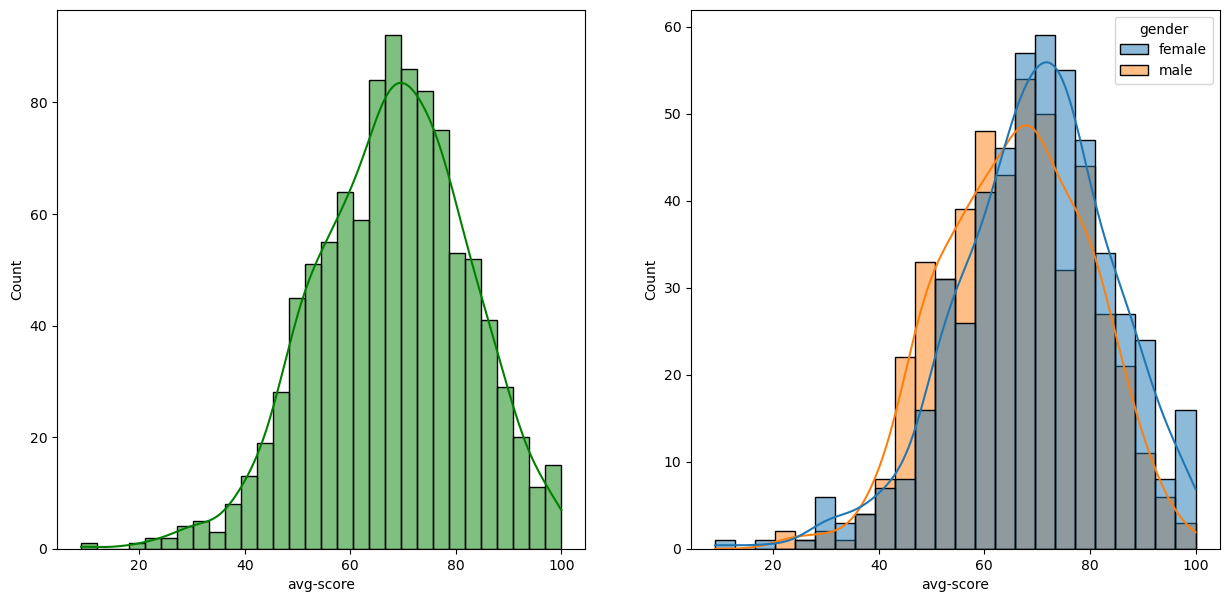

In [45]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x="avg-score", bins=30, kde=True, color="g")
plt.subplot(122)
sns.histplot(data=df, x="avg-score",          kde=True, hue='gender')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

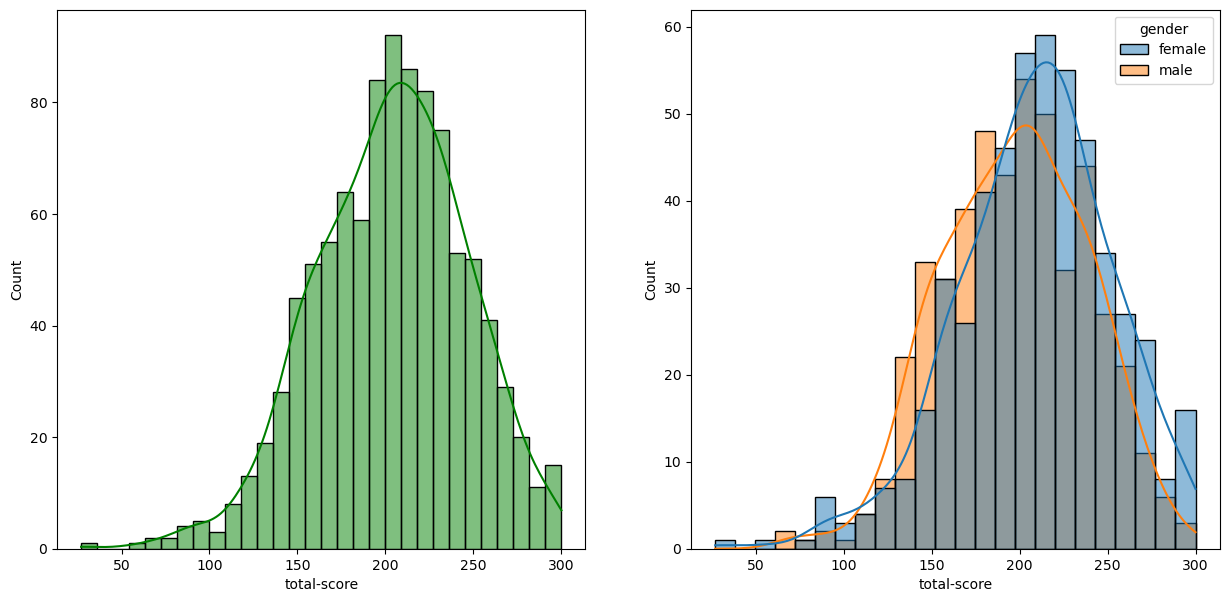

In [46]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x="total-score", bins=30, kde=True, color="g")
plt.subplot(122)
sns.histplot(data=df, x="total-score",          kde=True, hue='gender')
plt.show